In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.models import VGG19_Weights
from torchvision.models import vgg19
from torchvision import transforms
import torch.optim as optim
from torchvision.utils import save_image

from PIL import Image
import torch.nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
IMG_SIZE = 512

In [2]:
class VGGMod(nn.Module):
    def __init__(self):
        super(VGGMod, self).__init__()
        self.chosen_layers = [0, 5, 10, 19, 28]
        self.model = vgg19(weights = VGG19_Weights.DEFAULT).features[:29]
        
    def forward(self, x):
        activations = []
        for num_layer, layer in enumerate(self.model):
            x = layer(x)
            if num_layer in self.chosen_layers:
                activations.append(x)
        return activations

In [3]:
def load_image(image_path):  # Example size, adjust as needed
    transform = transforms.Compose([
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ToTensor()
    ])
    img = Image.open(image_path)
    img = transform(img).unsqueeze(0)  # Add batch dimension
    return img.to(device, torch.float)


In [13]:
content_img = load_image('taj_mahal.jpg')
style_img = load_image('vg_starry_night.jpg')
# gen_img = torch.randn(content_img.shape, device = device, requires_grad = True)
gen_img = content_img.clone().requires_grad_(True)
model = VGGMod().to(device).eval()

In [14]:
steps = 7000
lr = 0.001
alpha = 0.025
beta = 1
optimizer = optim.Adam([gen_img], lr = lr)



In [15]:
def content_loss_per_layer(content_act, gen_act):
    return torch.mean((content_act - gen_act)**2)

In [16]:
def style_loss_per_layer(style_act, gen_act):
    batch, channels, height, width = style_act.shape
    S = torch.mm(gen_act.view(channels, height * width), gen_act.view(channels, height * width).t())
    G = torch.mm(style_act.view(channels, height * width), style_act.view(channels,height * width).t())
    return torch.mean((S - G)**2)

In [17]:
def show_img(gen_img):
    img = gen_img.cpu().detach().squeeze(0).numpy()
    img = img.transpose(1, 2, 0)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [18]:
def train(model, content_img, style_img, gen_img, optimizer, alpha, beta):
    for step in range(steps):
        content_acts = model(content_img)
        style_acts = model(style_img)
        gen_acts = model(gen_img)
        content_loss = style_loss = 0
        for content_act, style_act, gen_act in zip(content_acts, style_acts, gen_acts):
            content_loss += content_loss_per_layer(content_act, gen_act)
            style_loss += style_loss_per_layer(style_act, gen_act)

        total_loss = alpha * content_loss + beta * style_loss
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()
        if step % 20 == 0:
            print(total_loss)
        if step % 1000 == 0:
            show_img(gen_img)
    

        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(160478.5469, device='cuda:0', grad_fn=<AddBackward0>)


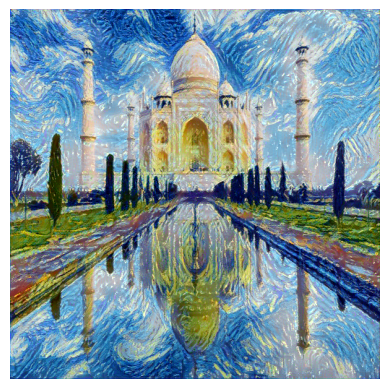

tensor(159377.6719, device='cuda:0', grad_fn=<AddBackward0>)
tensor(158550.5625, device='cuda:0', grad_fn=<AddBackward0>)
tensor(157518.3594, device='cuda:0', grad_fn=<AddBackward0>)
tensor(156636.2188, device='cuda:0', grad_fn=<AddBackward0>)
tensor(155780.5938, device='cuda:0', grad_fn=<AddBackward0>)
tensor(154857.6406, device='cuda:0', grad_fn=<AddBackward0>)
tensor(154047.9688, device='cuda:0', grad_fn=<AddBackward0>)
tensor(153022.8750, device='cuda:0', grad_fn=<AddBackward0>)
tensor(152136.9062, device='cuda:0', grad_fn=<AddBackward0>)
tensor(151284.1250, device='cuda:0', grad_fn=<AddBackward0>)
tensor(150501.4844, device='cuda:0', grad_fn=<AddBackward0>)
tensor(149688.7969, device='cuda:0', grad_fn=<AddBackward0>)
tensor(148740.9688, device='cuda:0', grad_fn=<AddBackward0>)
tensor(147949.5469, device='cuda:0', grad_fn=<AddBackward0>)
tensor(146999.5312, device='cuda:0', grad_fn=<AddBackward0>)
tensor(146349.4375, device='cuda:0', grad_fn=<AddBackward0>)
tensor(145351.9062, devi

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(121886.4141, device='cuda:0', grad_fn=<AddBackward0>)


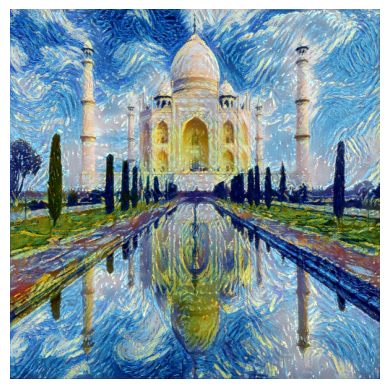

tensor(121450.4844, device='cuda:0', grad_fn=<AddBackward0>)
tensor(120493.6172, device='cuda:0', grad_fn=<AddBackward0>)
tensor(119852.0469, device='cuda:0', grad_fn=<AddBackward0>)
tensor(120062.7656, device='cuda:0', grad_fn=<AddBackward0>)
tensor(118988.9531, device='cuda:0', grad_fn=<AddBackward0>)
tensor(117944.4766, device='cuda:0', grad_fn=<AddBackward0>)
tensor(117367.3516, device='cuda:0', grad_fn=<AddBackward0>)
tensor(116773.3906, device='cuda:0', grad_fn=<AddBackward0>)
tensor(116553.9531, device='cuda:0', grad_fn=<AddBackward0>)
tensor(115667.9062, device='cuda:0', grad_fn=<AddBackward0>)
tensor(115402.3516, device='cuda:0', grad_fn=<AddBackward0>)
tensor(114453.6719, device='cuda:0', grad_fn=<AddBackward0>)
tensor(114681.5547, device='cuda:0', grad_fn=<AddBackward0>)
tensor(113453.7188, device='cuda:0', grad_fn=<AddBackward0>)
tensor(113052.4141, device='cuda:0', grad_fn=<AddBackward0>)
tensor(112240.9766, device='cuda:0', grad_fn=<AddBackward0>)
tensor(111815.1953, devi

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(96277.0547, device='cuda:0', grad_fn=<AddBackward0>)


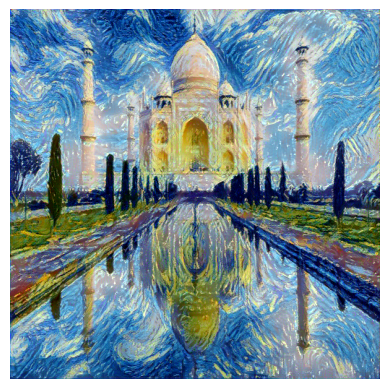

tensor(98342.3359, device='cuda:0', grad_fn=<AddBackward0>)
tensor(95612.6094, device='cuda:0', grad_fn=<AddBackward0>)
tensor(95203.9688, device='cuda:0', grad_fn=<AddBackward0>)
tensor(94951.7734, device='cuda:0', grad_fn=<AddBackward0>)
tensor(94394.3906, device='cuda:0', grad_fn=<AddBackward0>)
tensor(93819.6641, device='cuda:0', grad_fn=<AddBackward0>)
tensor(95377.6016, device='cuda:0', grad_fn=<AddBackward0>)
tensor(93203.8906, device='cuda:0', grad_fn=<AddBackward0>)
tensor(92756.1172, device='cuda:0', grad_fn=<AddBackward0>)
tensor(92309.5938, device='cuda:0', grad_fn=<AddBackward0>)
tensor(92355.4766, device='cuda:0', grad_fn=<AddBackward0>)
tensor(91663.6641, device='cuda:0', grad_fn=<AddBackward0>)
tensor(92595.3359, device='cuda:0', grad_fn=<AddBackward0>)
tensor(90892.5078, device='cuda:0', grad_fn=<AddBackward0>)
tensor(91346.0078, device='cuda:0', grad_fn=<AddBackward0>)
tensor(91051.4766, device='cuda:0', grad_fn=<AddBackward0>)
tensor(89842.4766, device='cuda:0', grad

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(80014.6016, device='cuda:0', grad_fn=<AddBackward0>)


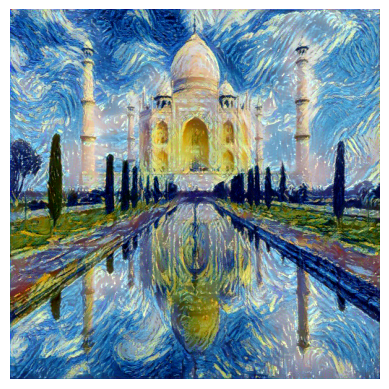

tensor(79872.4062, device='cuda:0', grad_fn=<AddBackward0>)
tensor(79177.2891, device='cuda:0', grad_fn=<AddBackward0>)
tensor(79468.7891, device='cuda:0', grad_fn=<AddBackward0>)
tensor(78691.6172, device='cuda:0', grad_fn=<AddBackward0>)
tensor(79326.4141, device='cuda:0', grad_fn=<AddBackward0>)
tensor(78180.9375, device='cuda:0', grad_fn=<AddBackward0>)
tensor(78175.2734, device='cuda:0', grad_fn=<AddBackward0>)
tensor(77576.6094, device='cuda:0', grad_fn=<AddBackward0>)
tensor(78417.4609, device='cuda:0', grad_fn=<AddBackward0>)
tensor(77389.0078, device='cuda:0', grad_fn=<AddBackward0>)
tensor(77434.6328, device='cuda:0', grad_fn=<AddBackward0>)
tensor(76752.6484, device='cuda:0', grad_fn=<AddBackward0>)
tensor(76445.5391, device='cuda:0', grad_fn=<AddBackward0>)
tensor(80349.1484, device='cuda:0', grad_fn=<AddBackward0>)
tensor(76714.3516, device='cuda:0', grad_fn=<AddBackward0>)
tensor(75835.9141, device='cuda:0', grad_fn=<AddBackward0>)
tensor(75497.0938, device='cuda:0', grad

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(68682.0703, device='cuda:0', grad_fn=<AddBackward0>)


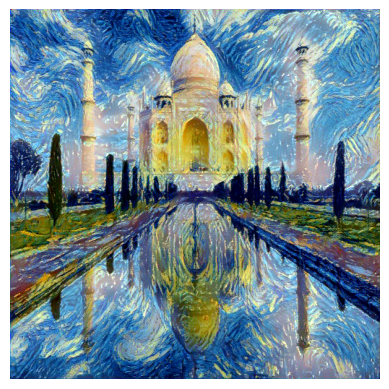

tensor(68691.9844, device='cuda:0', grad_fn=<AddBackward0>)
tensor(68918.7578, device='cuda:0', grad_fn=<AddBackward0>)
tensor(68294.7656, device='cuda:0', grad_fn=<AddBackward0>)
tensor(67961.9297, device='cuda:0', grad_fn=<AddBackward0>)
tensor(67730.4219, device='cuda:0', grad_fn=<AddBackward0>)
tensor(69714., device='cuda:0', grad_fn=<AddBackward0>)
tensor(67596.2344, device='cuda:0', grad_fn=<AddBackward0>)
tensor(67275.6875, device='cuda:0', grad_fn=<AddBackward0>)
tensor(67196.8125, device='cuda:0', grad_fn=<AddBackward0>)
tensor(67056.2109, device='cuda:0', grad_fn=<AddBackward0>)
tensor(66833.9922, device='cuda:0', grad_fn=<AddBackward0>)
tensor(67312., device='cuda:0', grad_fn=<AddBackward0>)
tensor(66469.3672, device='cuda:0', grad_fn=<AddBackward0>)
tensor(66397.0859, device='cuda:0', grad_fn=<AddBackward0>)
tensor(66070.5469, device='cuda:0', grad_fn=<AddBackward0>)
tensor(65922.6875, device='cuda:0', grad_fn=<AddBackward0>)
tensor(65866.7656, device='cuda:0', grad_fn=<Add

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(61176.1914, device='cuda:0', grad_fn=<AddBackward0>)


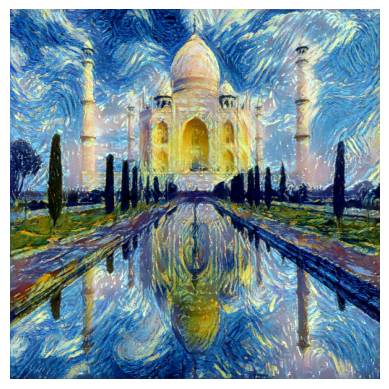

tensor(61963.5352, device='cuda:0', grad_fn=<AddBackward0>)
tensor(60847.7461, device='cuda:0', grad_fn=<AddBackward0>)
tensor(60610.5234, device='cuda:0', grad_fn=<AddBackward0>)
tensor(60675.3203, device='cuda:0', grad_fn=<AddBackward0>)
tensor(60407.5625, device='cuda:0', grad_fn=<AddBackward0>)
tensor(60273.3047, device='cuda:0', grad_fn=<AddBackward0>)
tensor(61713.5625, device='cuda:0', grad_fn=<AddBackward0>)
tensor(60104.3672, device='cuda:0', grad_fn=<AddBackward0>)
tensor(59896.1016, device='cuda:0', grad_fn=<AddBackward0>)
tensor(60088.2852, device='cuda:0', grad_fn=<AddBackward0>)
tensor(59598.3438, device='cuda:0', grad_fn=<AddBackward0>)
tensor(61587.8945, device='cuda:0', grad_fn=<AddBackward0>)
tensor(59689.8125, device='cuda:0', grad_fn=<AddBackward0>)
tensor(59493.7617, device='cuda:0', grad_fn=<AddBackward0>)
tensor(60087.2148, device='cuda:0', grad_fn=<AddBackward0>)
tensor(59106.1250, device='cuda:0', grad_fn=<AddBackward0>)
tensor(59451.0391, device='cuda:0', grad

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(55702.8906, device='cuda:0', grad_fn=<AddBackward0>)


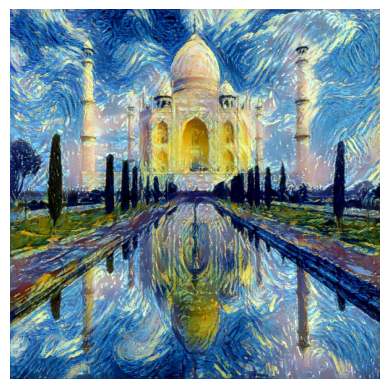

tensor(56747.1992, device='cuda:0', grad_fn=<AddBackward0>)
tensor(55524.9492, device='cuda:0', grad_fn=<AddBackward0>)
tensor(55382.1836, device='cuda:0', grad_fn=<AddBackward0>)
tensor(55999.8242, device='cuda:0', grad_fn=<AddBackward0>)
tensor(55082.5117, device='cuda:0', grad_fn=<AddBackward0>)
tensor(55222.0625, device='cuda:0', grad_fn=<AddBackward0>)
tensor(55201.9844, device='cuda:0', grad_fn=<AddBackward0>)
tensor(55618.8008, device='cuda:0', grad_fn=<AddBackward0>)
tensor(54987.3320, device='cuda:0', grad_fn=<AddBackward0>)
tensor(54740.8789, device='cuda:0', grad_fn=<AddBackward0>)
tensor(54576.8477, device='cuda:0', grad_fn=<AddBackward0>)
tensor(56266.4375, device='cuda:0', grad_fn=<AddBackward0>)
tensor(54921.5938, device='cuda:0', grad_fn=<AddBackward0>)
tensor(54288.4023, device='cuda:0', grad_fn=<AddBackward0>)
tensor(55732.8164, device='cuda:0', grad_fn=<AddBackward0>)
tensor(54355.9336, device='cuda:0', grad_fn=<AddBackward0>)
tensor(53983.4297, device='cuda:0', grad

In [21]:
train(model, content_img, style_img, gen_img, optimizer, alpha, beta)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


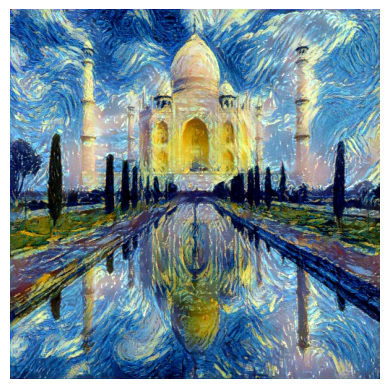

In [22]:
show_img(gen_img)

In [23]:
save_image(gen_img, 'spacecar.jpg')